In [6]:
import pandas as pd 
import numpy as np
import openpyxl
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

In [7]:
metro = pd.read_csv('eco2mix-metropoles-tr.csv', sep=';',decimal=',')
mfdata = pd.read_csv('meteo-france-donneesq-covid19.csv', sep =';', encoding = 'latin1', on_bad_lines='skip',decimal=',')
dpe = pd.read_excel('DPE.xlsx')

C:\Users\alexi\AppData\Local\Temp\ipykernel_17532\1792551842.py:1: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  metro = pd.read_csv('eco2mix-metropoles-tr.csv', sep=';',decimal=',')


In [8]:
metro.shape

(961632, 13)

# Météo France : MFDATA

In [9]:
mfdata['Date'] = pd.to_datetime(mfdata['DATE'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
mfdata.drop(columns=['DATE', 'POSTE', 'POSTE', 'LON', 'LAT', 'ALT', 'QRR', 'QTN', 'QTX', 'QTM', 'QFFM', 'QUN', 'QUX', 
                         'QDHUMI40', 'QDHUMI80', 'QUM'], inplace=True)                      

In [10]:
mfdata = mfdata.rename(columns={'RR' : 'Precipitation', 
                                      'TN' : 'Temperature_minimale',
                                      'TX' : 'Temperature_maximale', 
                                      'TM' : 'Temperature_moyenne',
                                      'FFM' : 'Moyenne_du_vent_a_10m', 
                                      'UN' : 'Humidite_relative_minimale',
                                      'UX' : 'Humidite_relative_maximale',
                                      'DHUMI40' : 'Duree_humidite_inf_a_40_pct', 
                                      'DHUMI80' : 'Duree_humidite_sup_a_80_pct',
                                      'UM' : 'Humidite_moyenne',
                                      'NOM' : 'Ville'})

# Consommation par métropole : METRO

In [11]:
metro['Ville']=''
metro.loc[metro['Métropole'] == 'Clermont Auvergne Métropole', 'Ville'] = 'CLERMONT-FD'
metro.loc[metro['Métropole'] == "Métropole d'Aix-Marseille-Provence", 'Ville'] = 'MARSEILLE'
metro.loc[metro['Métropole'] == 'Métropole de Lyon', 'Ville'] = 'LYON-BRON'
metro.loc[metro['Métropole'] == 'Dijon Métropole', 'Ville'] = 'DIJON-LONGVIC'
metro.loc[metro['Métropole'] == 'Métropole Grenoble-Alpes-Métropole', 'Ville'] = 'GRENOBLE-ST GEOIRS'
metro.loc[metro['Métropole'] == 'Métropole Européenne de Lille', 'Ville'] = 'LILLE-LESQUIN'
metro.loc[metro['Métropole'] == 'Métropole du Grand Nancy', 'Ville'] = 'NANCY-ESSEY'
metro.loc[metro['Métropole'] == 'Montpellier Méditerranée Métropole', 'Ville'] = 'MONTPELLIER-AEROPORT'
metro.loc[metro['Métropole'] == 'Nantes Métropole', 'Ville'] = 'NANTES-BOUGUENAIS' #Non
metro.loc[metro['Métropole'] == 'Bordeaux Métropole', 'Ville'] = 'BORDEAUX-MERIGNAC' #Non
metro.loc[metro['Métropole'] == 'Brest Métropole', 'Ville'] = 'BREST-GUIPAVAS' #Non
metro.loc[metro['Métropole'] == "Métropole Nice Côte d'Azur", 'Ville'] = 'NICE' #vérif si différent de marseilles et hyeres
metro.loc[metro['Métropole'] == "Métropole du Grand Paris", 'Ville'] = 'PARIS-MONTSOURIS'
metro.loc[metro['Métropole'] == "Eurométropole de Strasbourg", 'Ville'] = 'STRASBOURG-ENTZHEIM'
metro.loc[metro['Métropole'] == "Saint-Etienne Métropole", 'Ville'] = 'ST ETIENNE-BOUTHEON' #vérifier si différent de clermond
metro.loc[metro['Métropole'] == "Métropole Rennes Métropole", 'Ville'] = 'RENNES-ST JACQUES'#Non
metro.loc[metro['Métropole'] == "Métropole Rouen Normandie", 'Ville'] = 'ROUEN-BOOS'
metro.loc[metro['Métropole'] == "Métropole Toulon-Provence-Méditerranée", 'Ville'] = 'HYERES'#vérifier si différent de marseilles et nice
metro.loc[metro['Métropole'] == "Toulouse Métropole", 'Ville'] = 'TOULOUSE-BLAGNAC'
metro.loc[metro['Métropole'] == "Orléans Métropole", 'Ville'] = 'ORLEANS'
metro.loc[metro['Métropole'] == "Tours Métropole Val de Loire", 'Ville'] = 'TOURS'

#nom métropole = station météo

In [12]:
metro.dropna(subset='Consommation (MW)', inplace=True)

In [13]:
metro['Date'] = pd.to_datetime(metro['Date'])
metro_mean = metro.groupby(["Ville", pd.Grouper(key="Date", freq="D")]).agg({"Consommation (MW)": "mean"}).reset_index()

In [14]:
metro_mean['Date'] = metro_mean['Date'].dt.strftime('%Y-%m-%d') 
df = pd.merge(metro_mean, mfdata, on=['Date', 'Ville'], how='left')

# DATAVIZ PAR VILLE

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
graph = df.copy() #df pour les graph

In [ ]:
#Moyenne glissante
graph['Temperature_smooth'] = graph['Temperature_moyenne'].rolling(window=7).mean()
graph['consommation_smooth'] = graph['Consommation (MW)'].rolling(window=7).mean()
graph['vitesse_vent_smooth'] = graph['Moyenne_du_vent_a_10m'].rolling(window=7).mean()
graph['humidite_smooth'] = graph['Humidite_relative_maximale'].rolling(window=7).mean()

In [ ]:
paris = graph[graph['Ville'] == 'PARIS-MONTSOURIS']
orleans = graph[graph['Ville'] == 'ORLEANS']
marseille = graph[graph['Ville'] == 'MARSEILLE']
montpellier = graph[graph['Ville'] == 'MONTPELLIER-AEROPORT']
toulouse = graph[graph['Ville'] == 'TOULOUSE-BLAGNAC']

### Paris

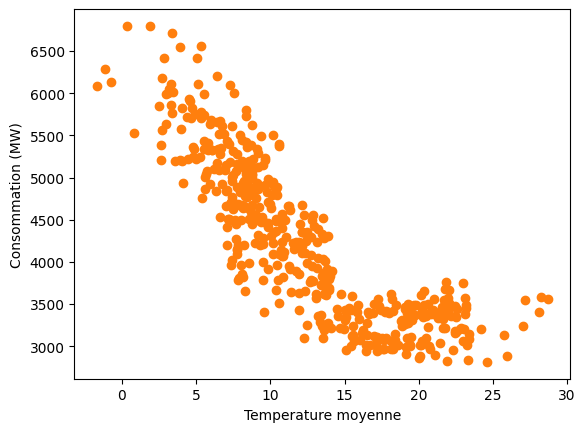

In [ ]:
#température et consommation
fig, ax = plt.subplots()

ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(paris['Temperature_smooth'], paris['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')

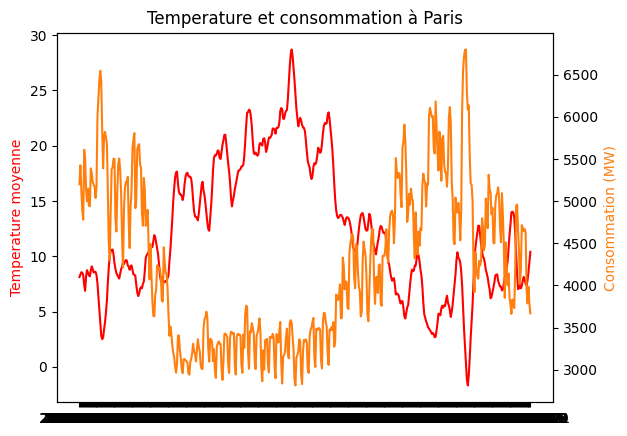

In [ ]:
#Température et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(paris['Date'], paris['Temperature_smooth'], "-r")
ax2.plot(paris['Date'], paris['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Paris")
plt.savefig('Temperature et consommation à Paris.png')
plt.show()

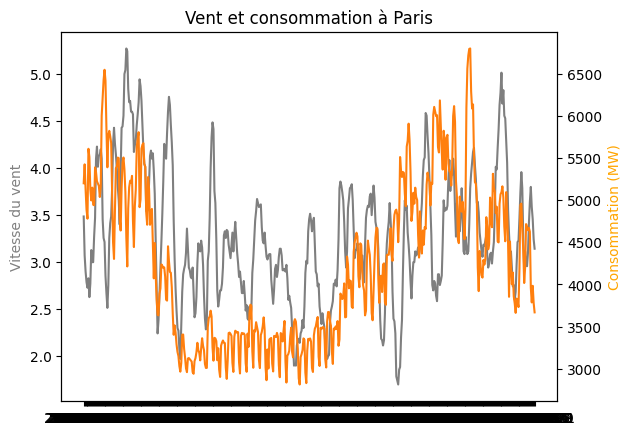

In [ ]:
#Vent et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(paris['Date'], paris['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(paris['Date'], paris['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Paris")
plt.savefig('Vitesse du vent et consommation à Paris.png')
plt.show()

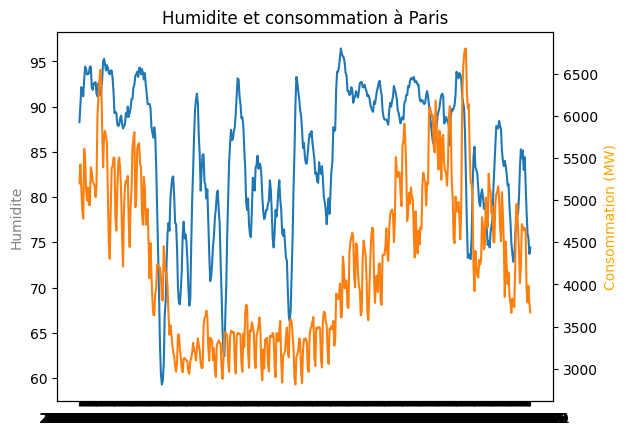

In [ ]:
#humidité et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(paris['Date'], paris['humidite_smooth'], color='tab:blue')
ax2.plot(paris['Date'], paris['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Paris")
plt.savefig('Humidite et consommation à Paris.png')
plt.show()

### Orléans

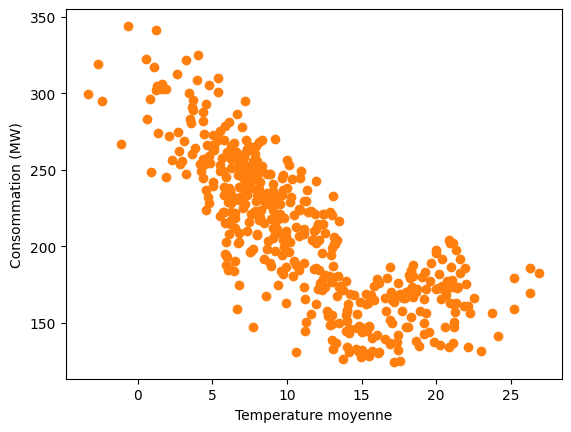

In [ ]:
#température et consommation
fig, ax = plt.subplots()

ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(orleans['Temperature_smooth'], orleans['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')

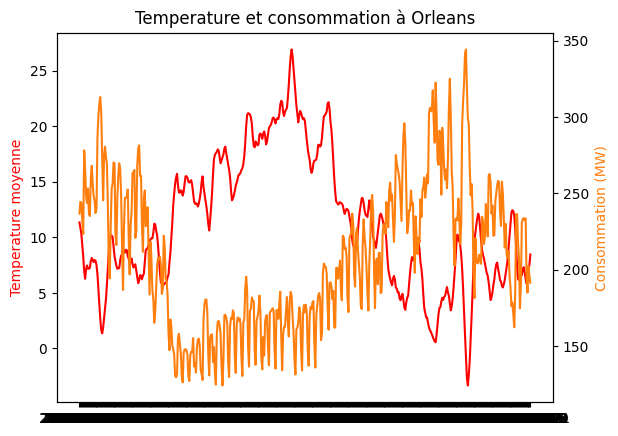

In [ ]:
#Température et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(orleans['Date'], orleans['Temperature_smooth'], "-r")
ax2.plot(orleans['Date'], orleans['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Orleans")
plt.savefig('Temperature et consommation à Orleans.png')
plt.show()

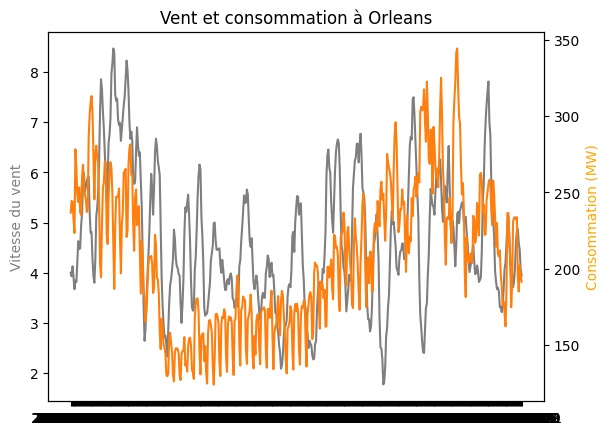

In [ ]:
#Vent et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(orleans['Date'], orleans['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(orleans['Date'], orleans['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Orleans")
plt.savefig('Vitesse du vent et consommation à Orleans.png')
plt.show()

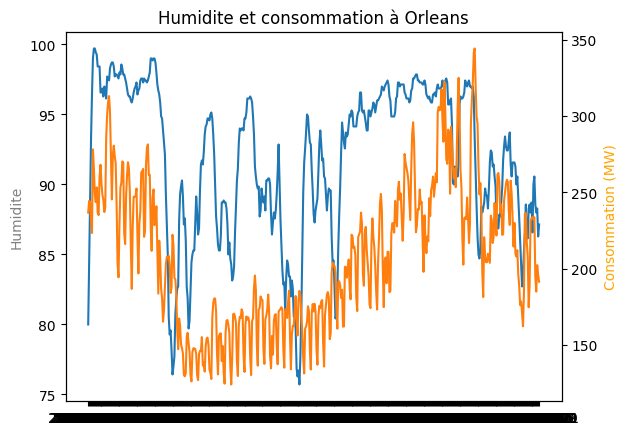

In [ ]:
#humidité et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(orleans['Date'], orleans['humidite_smooth'], color='tab:blue')
ax2.plot(orleans['Date'], orleans['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Orleans")
plt.savefig('Humidite et consommation à Orleans.png')
plt.show()

### Marseille

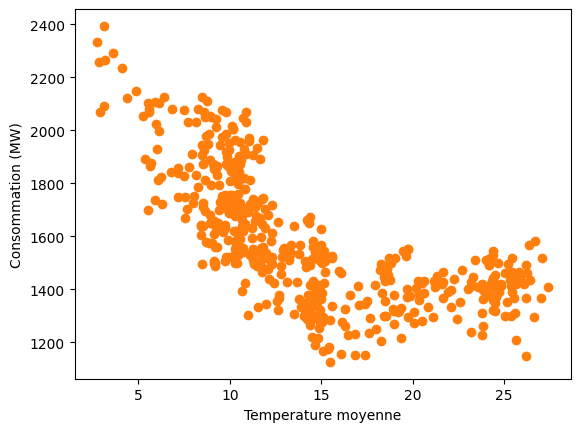

In [ ]:
#température et consommation
fig, ax = plt.subplots()

ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(marseille['Temperature_smooth'], marseille['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')

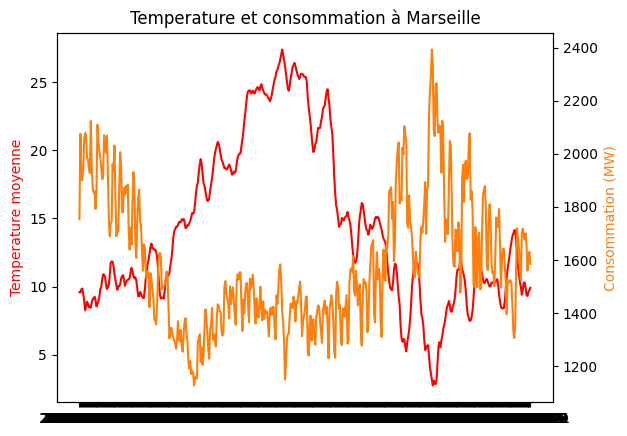

In [ ]:
#Température et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(marseille['Date'], marseille['Temperature_smooth'], "-r")
ax2.plot(marseille['Date'], marseille['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Marseille")
plt.savefig('Temperature et consommation à Marseille.png')
plt.show()

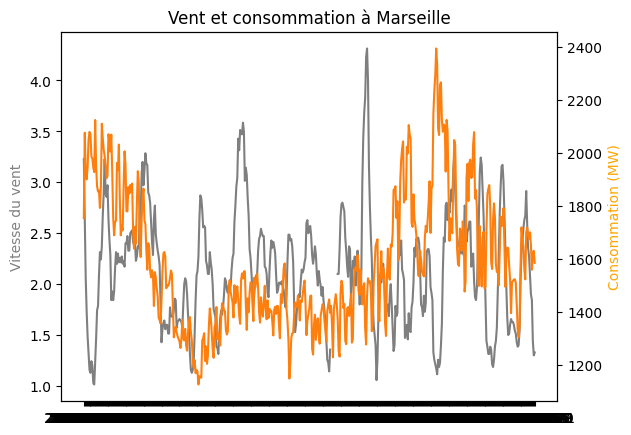

In [ ]:
#Vent et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(marseille['Date'], marseille['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(marseille['Date'], marseille['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Marseille")
plt.savefig('Vitesse du vent et consommation à Marseille.png')
plt.show()

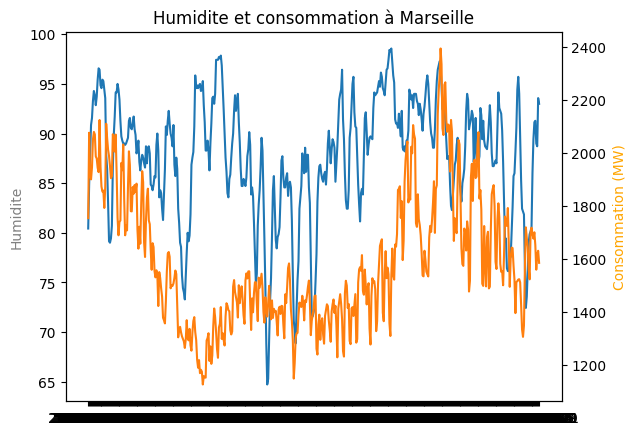

In [ ]:
#humidité et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(marseille['Date'], marseille['humidite_smooth'], color='tab:blue')
ax2.plot(marseille['Date'], marseille['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Marseille")
plt.savefig('Humidite et consommation à Marseille.png')
plt.show()

### Montpellier

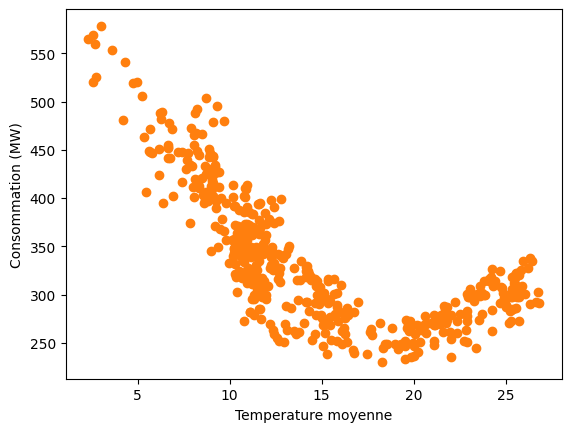

In [ ]:
#température et consommation
fig, ax = plt.subplots()

ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(montpellier['Temperature_smooth'], montpellier['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')

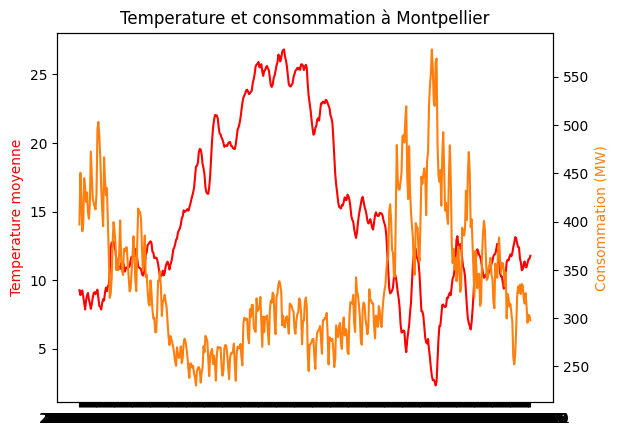

In [ ]:
#Température et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(montpellier['Date'], montpellier['Temperature_smooth'], "-r")
ax2.plot(montpellier['Date'], montpellier['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Montpellier")
plt.savefig('Temperature et consommation à Montpellier.png')
plt.show()

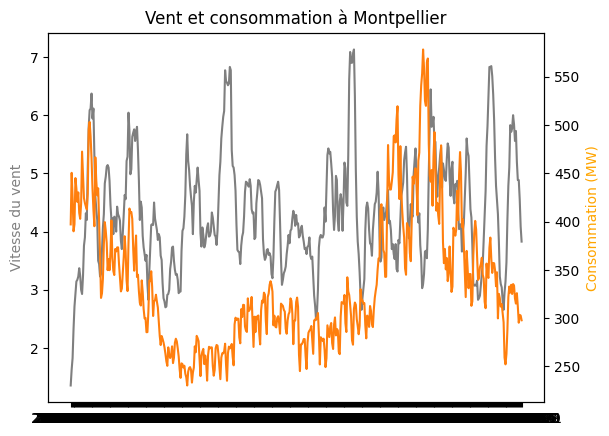

In [ ]:
#Vent et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(montpellier['Date'], montpellier['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(montpellier['Date'], montpellier['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Montpellier")
plt.savefig('Vitesse du vent et consommation à Montpellier.png')
plt.show()

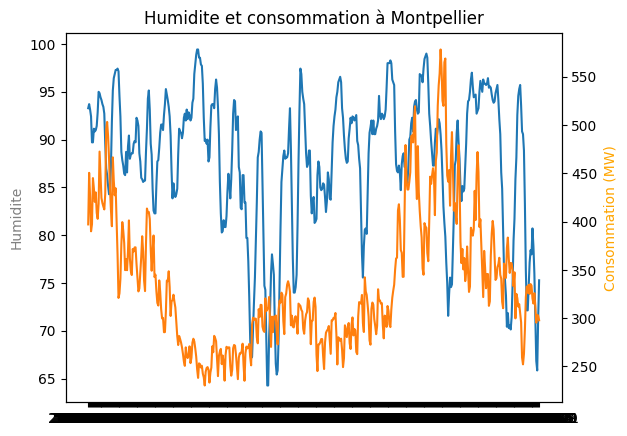

In [ ]:
#humidité et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(montpellier['Date'], montpellier['humidite_smooth'], color='tab:blue')
ax2.plot(montpellier['Date'], montpellier['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Montpellier")
plt.savefig('Humidite et consommation à Montpellier.png')
plt.show()

### Toulouse

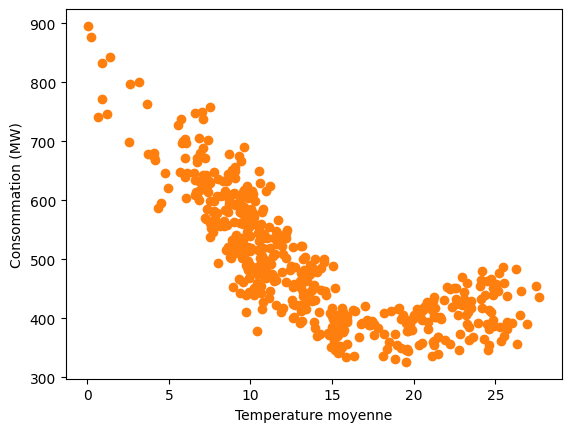

In [ ]:
#température et consommation
fig, ax = plt.subplots()

ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(toulouse['Temperature_smooth'], toulouse['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')

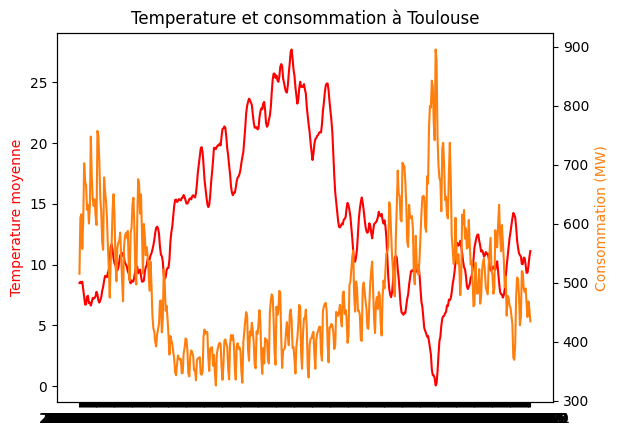

In [ ]:
#Température et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(toulouse['Date'], toulouse['Temperature_smooth'], "-r")
ax2.plot(toulouse['Date'], toulouse['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Toulouse")
plt.savefig('Temperature et consommation à Toulouse.png')
plt.show()

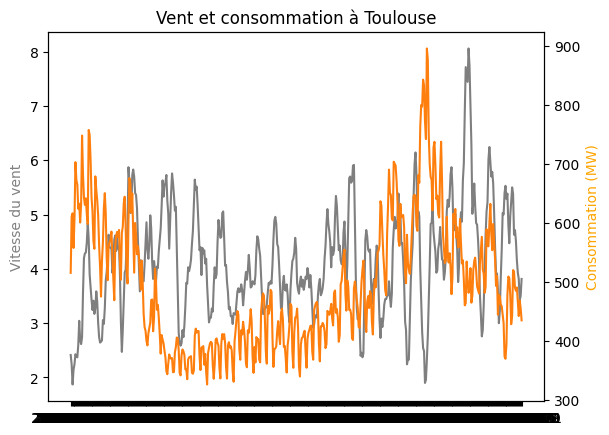

In [ ]:
#Vent et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(toulouse['Date'], toulouse['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(toulouse['Date'], toulouse['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Toulouse")
plt.savefig('Vitesse du vent et consommation à Toulouse.png')
plt.show()

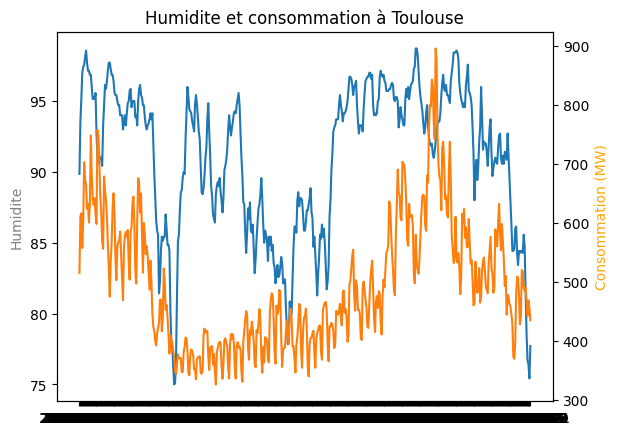

In [ ]:
#humidité et consommation
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(toulouse['Date'], toulouse['humidite_smooth'], color='tab:blue')
ax2.plot(toulouse['Date'], toulouse['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Toulouse")
plt.savefig('Humidite et consommation à Toulouse.png')
plt.show()

# DATAVIZ PAR VARIABLE

Temperature conso

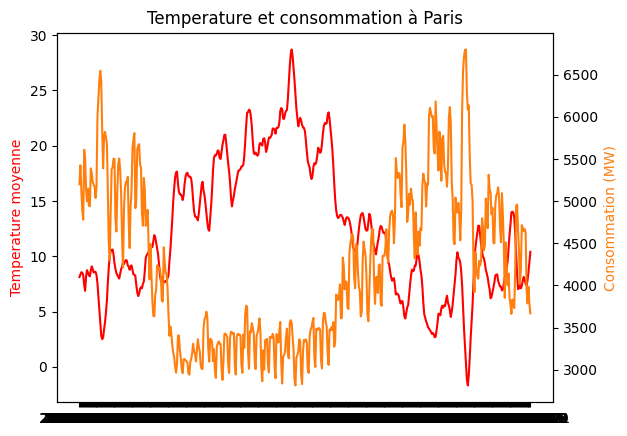

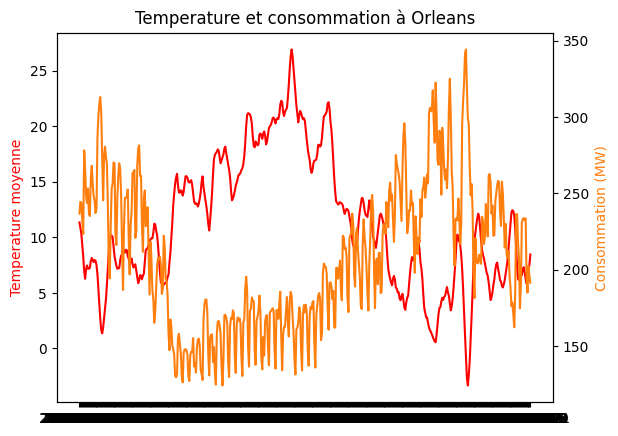

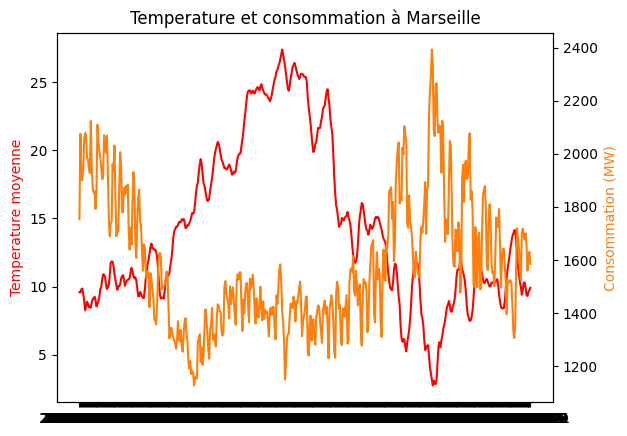

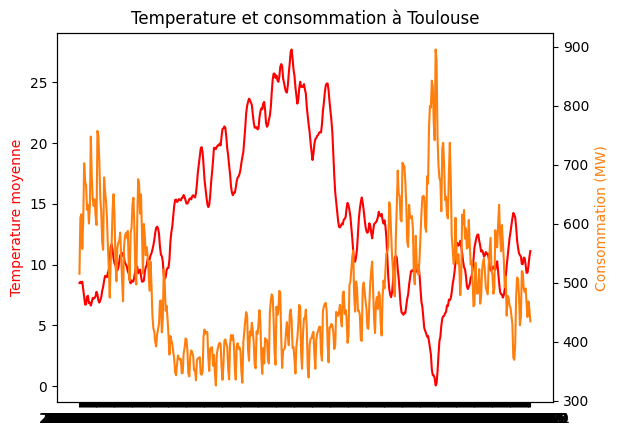

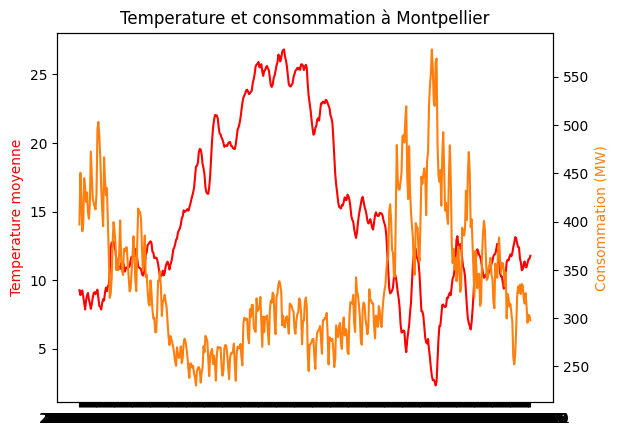

In [21]:
#paris.plot(x="Date", y=["Temperature_smooth", 'Consommation (MW)'])
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(paris['Date'], paris['Temperature_smooth'], "-r")
ax2.plot(paris['Date'], paris['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Paris")
plt.savefig('Temperature et consommation à Paris.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(orleans['Date'], orleans['Temperature_smooth'], "-r")
ax2.plot(orleans['Date'], orleans['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Orleans")
plt.savefig('Temperature et consommation à Orleans.png')
plt.show()


fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(marseille['Date'], marseille['Temperature_smooth'], "-r")
ax2.plot(marseille['Date'], marseille['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Marseille")
plt.savefig('Temperature et consommation à Marseille.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(toulouse['Date'], toulouse['Temperature_smooth'], "-r")
ax2.plot(toulouse['Date'], toulouse['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Toulouse")
plt.savefig('Temperature et consommation à Toulouse.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(montpellier['Date'], montpellier['Temperature_smooth'], "-r")
ax2.plot(montpellier['Date'], montpellier['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Temperature moyenne', color='r')
ax2.set_ylabel('Consommation (MW)', color='tab:orange')
ax.set_title("Temperature et consommation à Montpellier")
plt.savefig('Temperature et consommation à Montpellier.png')
plt.show()

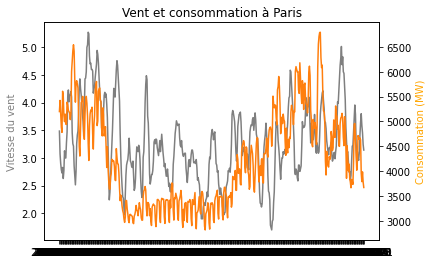

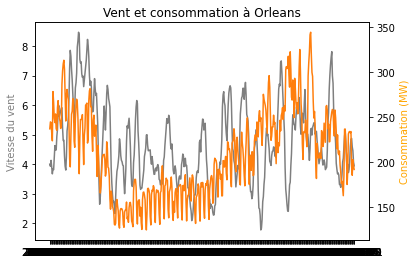

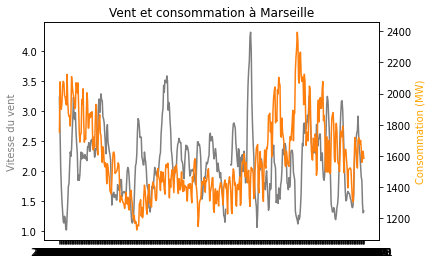

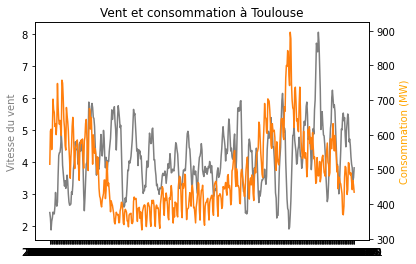

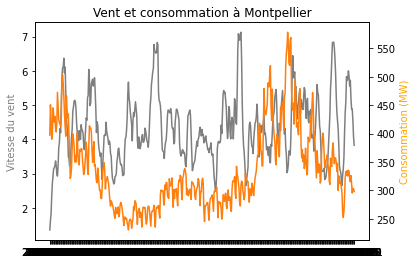

In [68]:
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(paris['Date'], paris['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(paris['Date'], paris['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Paris")
plt.savefig('Vitesse du vent et consommation à Paris.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(orleans['Date'], orleans['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(orleans['Date'], orleans['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Orleans")
plt.savefig('Vitesse du vent et consommation à Orleans.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(marseille['Date'], marseille['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(marseille['Date'], marseille['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Marseille")
plt.savefig('Vitesse du vent et consommation à Marseille.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(toulouse['Date'], toulouse['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(toulouse['Date'], toulouse['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Toulouse")
plt.savefig('Vitesse du vent et consommation à Toulouse.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(montpellier['Date'], montpellier['vitesse_vent_smooth'], color='tab:grey')
ax2.plot(montpellier['Date'], montpellier['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Vitesse du vent', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Vent et consommation à Montpellier")
plt.savefig('Vitesse du vent et consommation à Montpellier.png')
plt.show()

Humidite et consommation

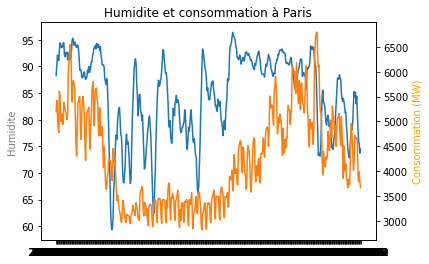

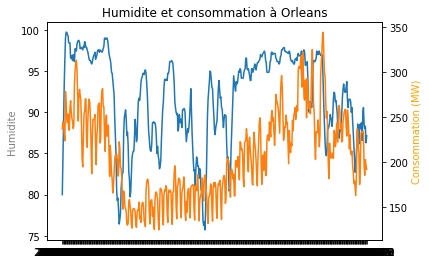

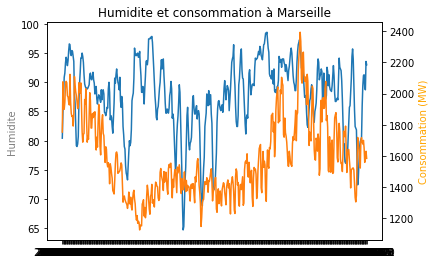

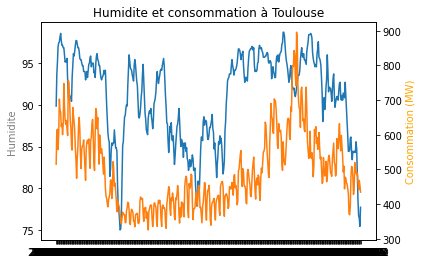

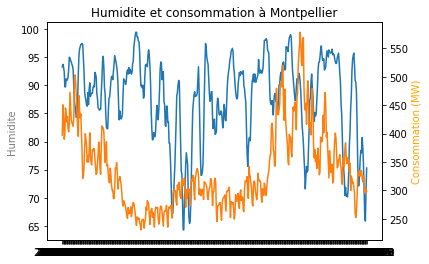

In [70]:
fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(paris['Date'], paris['humidite_smooth'], color='tab:blue')
ax2.plot(paris['Date'], paris['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Paris")
plt.savefig('Humidite et consommation à Paris.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(orleans['Date'], orleans['humidite_smooth'], color='tab:blue')
ax2.plot(orleans['Date'], orleans['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Orleans")
plt.savefig('Humidite et consommation à Orleans.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(marseille['Date'], marseille['humidite_smooth'], color='tab:blue')
ax2.plot(marseille['Date'], marseille['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Marseille")
plt.savefig('Humidite et consommation à Marseille.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(toulouse['Date'], toulouse['humidite_smooth'], color='tab:blue')
ax2.plot(toulouse['Date'], toulouse['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Toulouse")
plt.savefig('Humidite et consommation à Toulouse.png')
plt.show()

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(montpellier['Date'], montpellier['humidite_smooth'], color='tab:blue')
ax2.plot(montpellier['Date'], montpellier['Consommation (MW)'],color='tab:orange')
ax.set_ylabel('Humidite', color='grey')
ax2.set_ylabel('Consommation (MW)', color='orange')
ax.set_title("Humidite et consommation à Montpellier")
plt.savefig('Humidite et consommation à Montpellier".png')
plt.show()

## Température

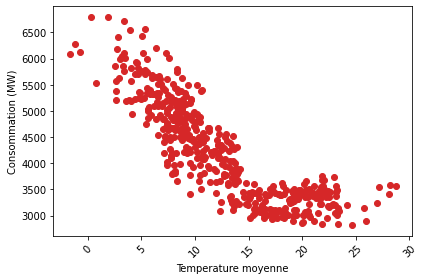

<Figure size 432x288 with 0 Axes>

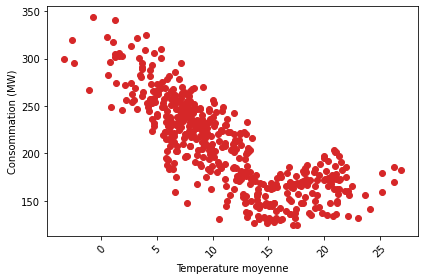

<Figure size 432x288 with 0 Axes>

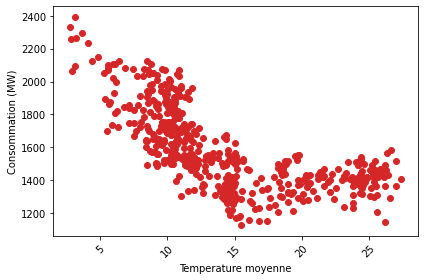

<Figure size 432x288 with 0 Axes>

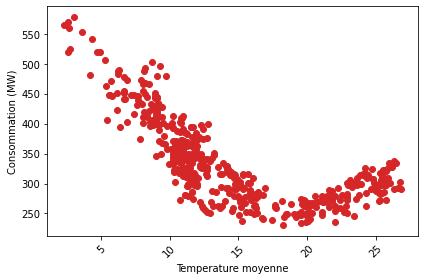

<Figure size 432x288 with 0 Axes>

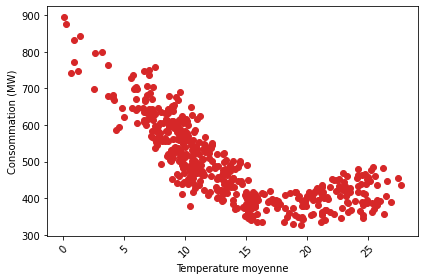

<Figure size 432x288 with 0 Axes>

In [75]:
fig, ax = plt.subplots()



ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(paris['Temperature_smooth'], paris['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig('Consommation en fonction de la temperature à Paris".png')

fig, ax = plt.subplots()



ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(orleans['Temperature_smooth'], orleans['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig('Consommation en fonction de la temperature à Orleans".png')
fig, ax = plt.subplots()



ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(marseille['Temperature_smooth'], marseille['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig('Consommation en fonction de la temperature à Marseille".png')
fig, ax = plt.subplots()



ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(montpellier['Temperature_smooth'], montpellier['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig('Consommation en fonction de la temperature à Montpellier".png')
fig, ax = plt.subplots()



ax.set_xlabel('Temperature moyenne')
ax.set_ylabel('Consommation (MW)')
ax.plot(toulouse['Temperature_smooth'], toulouse['Consommation (MW)'],linestyle="",marker="o", color='tab:orange')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig('Consommation en fonction de la temperature à Toulouse".png')


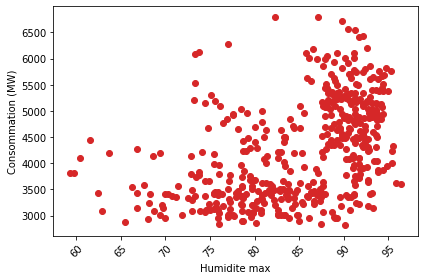

<Figure size 432x288 with 0 Axes>

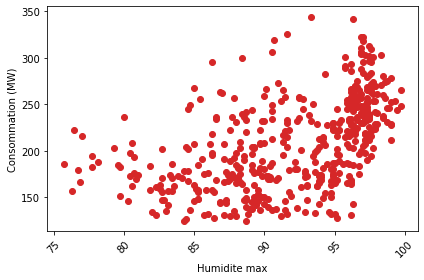

<Figure size 432x288 with 0 Axes>

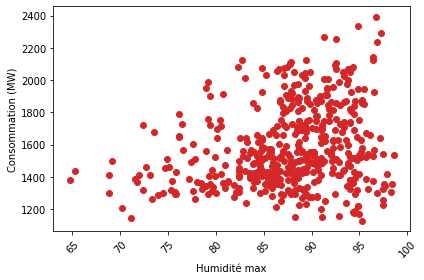

<Figure size 432x288 with 0 Axes>

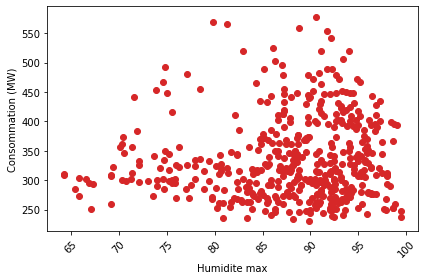

<Figure size 432x288 with 0 Axes>

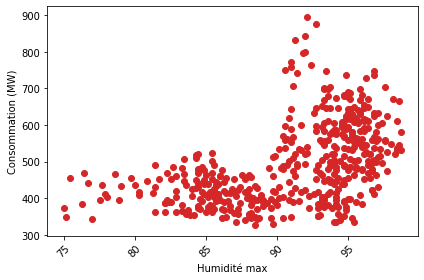

<Figure size 432x288 with 0 Axes>

In [78]:
fig, ax = plt.subplots()



ax.set_xlabel('Humidite max')
ax.set_ylabel('Consommation (MW)')
ax.plot(paris['humidite_smooth'], paris['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction de l'humidité à Paris.png")

fig, ax = plt.subplots()



ax.set_xlabel('Humidite max')
ax.set_ylabel('Consommation (MW)')
ax.plot(orleans['humidite_smooth'], orleans['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction de l'humidité à Orleans.png")
fig, ax = plt.subplots()



ax.set_xlabel('Humidité max')
ax.set_ylabel('Consommation (MW)')
ax.plot(marseille['humidite_smooth'], marseille['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction de l'humidité à Marseille.png")
fig, ax = plt.subplots()



ax.set_xlabel('Humidite max')
ax.set_ylabel('Consommation (MW)')
ax.plot(montpellier['humidite_smooth'], montpellier['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction de l'humidité à Montpellier.png")
fig, ax = plt.subplots()



ax.set_xlabel('Humidité max')
ax.set_ylabel('Consommation (MW)')
ax.plot(toulouse['humidite_smooth'], toulouse['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction de l'humidité à Toulouse.png")

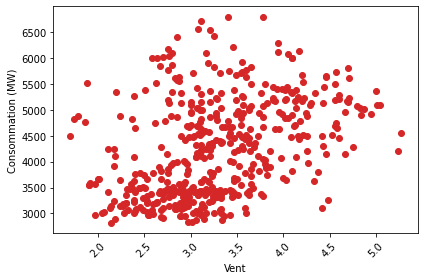

<Figure size 432x288 with 0 Axes>

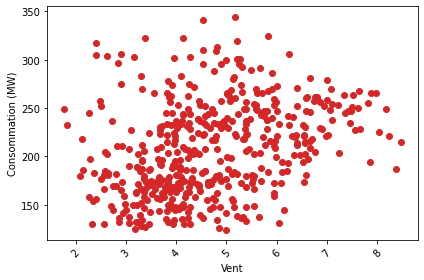

<Figure size 432x288 with 0 Axes>

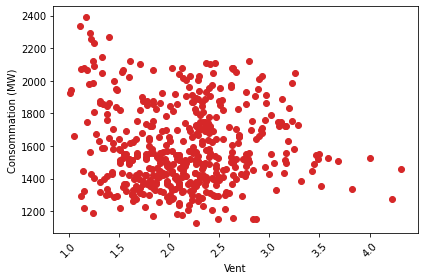

<Figure size 432x288 with 0 Axes>

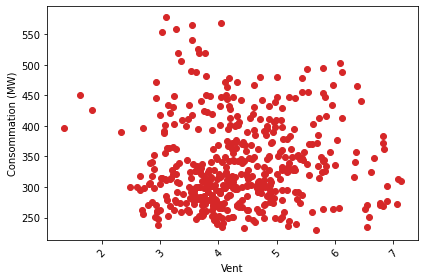

<Figure size 432x288 with 0 Axes>

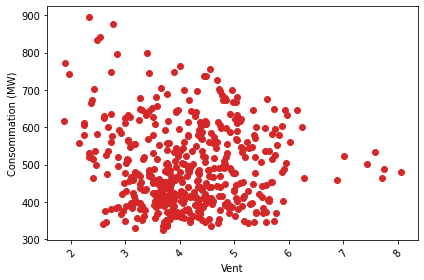

<Figure size 432x288 with 0 Axes>

In [80]:
fig, ax = plt.subplots()



ax.set_xlabel('Vent')
ax.set_ylabel('Consommation (MW)')
ax.plot(paris['vitesse_vent_smooth'], paris['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction du vent à Paris.png")

fig, ax = plt.subplots()



ax.set_xlabel('Vent')
ax.set_ylabel('Consommation (MW)')
ax.plot(orleans['vitesse_vent_smooth'], orleans['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction du vent à Orleans.png")
fig, ax = plt.subplots()



ax.set_xlabel('Vent')
ax.set_ylabel('Consommation (MW)')
ax.plot(marseille['vitesse_vent_smooth'], marseille['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction du vent à Marseille.png")
fig, ax = plt.subplots()



ax.set_xlabel('Vent')
ax.set_ylabel('Consommation (MW)')
ax.plot(montpellier['vitesse_vent_smooth'], montpellier['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction du vent à Montpellier.png")
fig, ax = plt.subplots()



ax.set_xlabel('Vent')
ax.set_ylabel('Consommation (MW)')
ax.plot(toulouse['vitesse_vent_smooth'], toulouse['Consommation (MW)'],linestyle="",marker="o", color='tab:red')
ax.tick_params(axis='y')


plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()
plt.savefig("Consommation en fonction du vent à Toulouse.png")